# imports

In [73]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [74]:
from main import *
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle

# visualize data

tensor(-0.4242) tensor(2.8215)


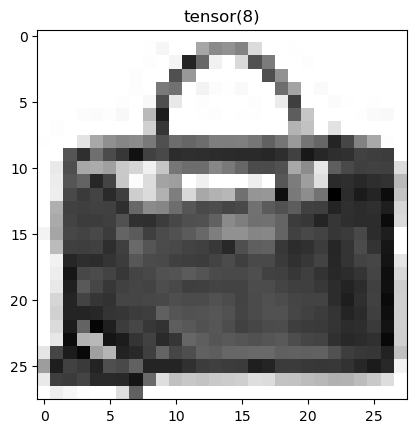

In [75]:
train_loader, validate_loader, test_loader = load_original_mnist_fashion(1000,10)
x,y = next(iter(train_loader))
plt.imshow(1-x[0][0],cmap='gray')
plt.title(y[0])
print(x.min(),x.max())

# read results

In [76]:
cd /net/projects/willettlab/sueparkinson/deeprelu/fashionMNIST

/net/projects/willettlab/sueparkinson/deeprelu/fashionMNIST


In [77]:
res = []
modelclasses = [ModelA,ModelB,ModelC,ModelD,ModelE,ModelF,ModelG,
                ModelA_middlelinear,ModelB_middlelinear,ModelC_middlelinear,ModelD_middlelinear,ModelE_middlelinear,ModelF_middlelinear,ModelG_middlelinear]
for model in modelclasses:
    modelres = {}

    #load model from state dict
    m = model(image_size=28 * 28, lr = 0)
    model_letter = m.name[6]
    filename = "_model_"+m.name[6]
    if len(m.name) > 7:
        ismiddlelinear = True
        filename += 'ml'
    else:
        ismiddlelinear = False
    print("loading",filename+"/model.pt onto",model)
    model_state_dict = torch.load(filename+"/model.pt")
    m.load_state_dict(model_state_dict)
    m.eval()

    #load pickle file for model
    try:
        with open(f"{filename}/model.pkl", "rb") as f:
            p = pickle.load(f)
    except EOFError as e:
        print(e)

    #save results for model into dictionary
    modelres["name"] = p.name[6]
    modelres["middlelinear"] = ismiddlelinear
    modelres["# hidden layers"] = 4 if (ismiddlelinear or p.name[6] > "D") else 2
    modelres["model sketch"] = m.modelsketch
    modelres["optimizer"] = str(p.optimizer)[:4]
    modelres["learning rate"] = p.lr
    modelres["epochs"] = len(p.train_accuracies)
    modelres["batch normalization"] = True if p.name[6] in "DG" else False
    modelres["dropout"] = True if p.name[6] in "CG" else False
    modelres["final train_accuracies"] = p.train_accuracies[-1]
    modelres["final train_loss"] = p.train_loss[-1]
    modelres["final validate_accuracies"] = p.validate_accuracies[-1]
    modelres["final validate_loss"] = p.validate_loss[-1]
    modelres["final test_accuracies"] = p.test_accuracies[-1]
    modelres["final test_loss"] = p.test_loss[-1]
    modelres["train_accuracies"] = p.train_accuracies
    modelres["train_loss"] = p.train_loss
    modelres["validate_accuracies"] = p.validate_accuracies
    modelres["validate_loss"] = p.validate_loss
    modelres["test_accuracies"] = p.test_accuracies
    modelres["test_loss"] = p.test_loss
    modelres["model for eval"] = m
    modelres["pickle file"] = p

    res.append(modelres)
res = pd.DataFrame(res)

loading _model_A/model.pt onto <class 'main.ModelA'>
loading _model_B/model.pt onto <class 'main.ModelB'>
loading _model_C/model.pt onto <class 'main.ModelC'>
loading _model_D/model.pt onto <class 'main.ModelD'>
loading _model_E/model.pt onto <class 'main.ModelE'>
loading _model_F/model.pt onto <class 'main.ModelF'>
loading _model_G/model.pt onto <class 'main.ModelG'>
loading _model_Aml/model.pt onto <class 'main.ModelA_middlelinear'>
loading _model_Bml/model.pt onto <class 'main.ModelB_middlelinear'>
loading _model_Cml/model.pt onto <class 'main.ModelC_middlelinear'>
loading _model_Dml/model.pt onto <class 'main.ModelD_middlelinear'>
loading _model_Eml/model.pt onto <class 'main.ModelE_middlelinear'>
loading _model_Fml/model.pt onto <class 'main.ModelF_middlelinear'>
loading _model_Gml/model.pt onto <class 'main.ModelG_middlelinear'>


In [78]:
res

,name,middlelinear,# hidden layers,model sketch,optimizer,learning rate,epochs,batch normalization,dropout,final train_accuracies,...,final test_accuracies,final test_loss,train_accuracies,train_loss,validate_accuracies,validate_loss,test_accuracies,test_loss,model for eval,pickle file
0,A,False,2,100 ReLU 50 ReLU 10 Softmax,SGD,0.1200,19,False,False,90.209259,...,87.76,0.343438,"[75.63148148148149, 83.72962962962963, 85.4888...","[0.70908912619838, 0.45407364988327026, 0.4023...","[81.45, 84.6, 85.03333333333333, 85.95, 86.816...","[0.50438649670283, 0.4231002275149027, 0.40542...","[80.74, 83.56, 84.22, 85.37, 85.97, 86.36, 86....","[0.5265525437355042, 0.4508635232925415, 0.436...","ModelA(\n (fc0): Linear(in_features=784, out_...","ModelA(\n (fc0): Linear(in_features=784, out_..."
1,B,False,2,100 ReLU 50 ReLU 10 Softmax,Adam,0.0001,25,False,False,84.562963,...,83.08,0.472084,"[57.6, 76.96296296296296, 79.97222222222223, 8...","[1.4265233975869638, 0.736211624428078, 0.6042...","[73.56666666666666, 78.35, 80.48333333333333, ...","[0.8704624525705973, 0.6505606899261475, 0.572...","[73.05, 77.8, 79.93, 81.0, 81.73, 82.23, 82.54...","[0.8848914382934571, 0.6649954626083374, 0.587...","ModelB(\n (fc0): Linear(in_features=784, out_...","ModelB(\n (fc0): Linear(in_features=784, out_..."
2,C,False,2,100 ReLU 50 ReLU 10 Softmax,Adam,0.0001,26,False,True,82.187037,...,82.69,0.489232,"[47.99074074074074, 71.45185185185186, 75.6259...","[1.590676074133979, 0.8985561578538682, 0.7293...","[72.01666666666667, 77.76666666666667, 79.85, ...","[1.009055690765381, 0.7145502834320069, 0.6172...","[71.52, 77.24, 79.05, 80.16, 80.83, 81.61, 82....","[1.0194674549102782, 0.7268041358947754, 0.632...","ModelC(\n (fc0): Linear(in_features=784, out_...","ModelC(\n (fc0): Linear(in_features=784, out_..."
3,D,False,2,100 ReLU 50 ReLU 10 Softmax,Adam,0.0100,18,True,False,93.794444,...,89.30,0.305813,"[82.94814814814815, 86.99444444444444, 88.2166...","[0.5022192527453104, 0.3561618208708586, 0.319...","[85.78333333333333, 87.81666666666666, 87.9833...","[0.39923496993382773, 0.34062428283691404, 0.3...","[84.55, 86.76, 86.91, 87.51, 86.96, 87.94, 88....","[0.42663482093811034, 0.3669264856338501, 0.36...","ModelD(\n (fc0): Linear(in_features=784, out_...","ModelD(\n (fc0): Linear(in_features=784, out_..."
4,E,False,4,128 ReLU 64 ReLU 10 ReLU 10 ReLU 10 Softmax,SGD,0.1000,19,False,False,90.238889,...,87.54,0.363651,"[46.67037037037037, 75.6462962962963, 80.35185...","[1.413590716821176, 0.6665502166748047, 0.5367...","[68.51666666666667, 76.58333333333333, 80.5333...","[0.8111907316843668, 0.6157331250508626, 0.521...","[68.83, 76.6, 80.22, 84.23, 84.55, 85.95, 85.6...","[0.8184945423126221, 0.6282572961807251, 0.540...","ModelE(\n (fc0): Linear(in_features=784, out_...","ModelE(\n (fc0): Linear(in_features=784, out_..."
5,F,False,4,128 Sigmoid 64 Sigmoid 10 Sigmoid 10 Sigmoid 1...,Adam,0.0010,21,False,False,41.794444,...,41.15,1.353921,"[13.794444444444444, 20.36111111111111, 25.494...","[2.257743896766945, 1.9915629044991952, 1.8266...","[20.466666666666665, 20.716666666666665, 28.23...","[2.125641815185547, 1.8964965909322102, 1.7847...","[20.64, 21.0, 28.23, 29.13, 36.37, 39.37, 40.2...","[2.128998173522949, 1.9027229949951172, 1.7906...","ModelF(\n (fc0): Linear(in_features=784, out_...","ModelF(\n (fc0): Linear(in_features=784, out_..."
6,G,False,4,512 LeakyReLU 256 LeakyReLU 128 LeakyReLU 64 L...,SGD,0.0010,28,True,True,93.807407,...,90.55,0.278975,"[81.37407407407407, 86.1574074074074, 87.25555...","[0.6707420018160785, 0.4027337857705575, 0.356...","[86.71666666666667, 87.16666666666667, 88.0333...","[0.3975236808458964, 0.35741117000579836, 0.33...","[85.02, 86.81, 86.99, 88.14, 88.26, 87.44, 88....","[0.42078506507873537, 0.3671038681983948, 0.35...","ModelG(\n (batch_norm_0): BatchNorm1d(784, ep...","ModelG(\n (batch_norm_0): BatchNorm1d(784, ep..."
7,A,True,4,100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax,SGD,0.1200,21,False,False,91.

In [79]:
res.columns

Index(['name', 'middlelinear', '# hidden layers', 'model sketch', 'optimizer',
       'learning rate', 'epochs', 'batch normalization', 'dropout',
       'final train_accuracies', 'final train_loss',
       'final validate_accuracies', 'final validate_loss',
       'final test_accuracies', 'final test_loss', 'train_accuracies',
       'train_loss', 'validate_accuracies', 'validate_loss', 'test_accuracies',
       'test_loss', 'model for eval', 'pickle file'],
      dtype='object')

# pairwise distances

In [80]:
def pairwise_L2_distance(f1,f2,d,domain_lb=-0.5,domain_ub=0.5,numsamples=2000,seed=892):
    logging.info(f"{f1,f2,domain_lb,domain_ub,numsamples,seed}")
    np.random.seed(seed)
    #create samples from U[domainlb,domainub]^d 
    samplesX = np.random.rand(d,numsamples).astype(np.float32) #distributed as U[0,1]^d
    domain_size = domain_ub - domain_lb
    samplesX *= domain_size #distributed as U[0,domain_ub - domain_lb]^d
    samplesX += domain_lb #distributed as U[domain_lb,domain_ub]^d
    samplesX = torch.from_numpy(samplesX).T # move to device
    #compute E[(f1(x) - f2(x))^2]
    with torch.no_grad():
        f1eval = f1(samplesX)
        f2eval = f2(samplesX)
        distance = nn.functional.mse_loss(f1eval,f2eval).item()
    return distance

In [81]:
for m1 in res["model for eval"]:
    dist_from_m1 = []
    for m2 in res["model for eval"]:
        dist = pairwise_L2_distance(m1,m2,d=28*28,domain_lb=-0.4242,domain_ub=2.8215)
        dist_from_m1.append(dist)
    res["dist from "+m1.name] = dist_from_m1

KeyboardInterrupt: 

In [ ]:
res

,name,middlelinear,# hidden layers,model sketch,optimizer,learning rate,epochs,batch normalization,dropout,final train_accuracies,...,dist from Model E,dist from Model F,dist from Model G,dist from Model A middle linear,dist from Model B middle linear,dist from Model C middle linear,dist from Model D middle linear,dist from Model E middle linear,dist from Model F middle linear,dist from Model G middle linear
0,A,False,2,100 ReLU 50 ReLU 10 Softmax,SGD,0.1200,19,False,False,90.209259,...,3.028375,9.887032,23.190546,2.124603,4.561251,4.261119,40.798141,3.567519,2.585584,29.949963
1,B,False,2,100 ReLU 50 ReLU 10 Softmax,Adam,0.0001,25,False,False,84.562963,...,3.881537,9.907887,31.814316,3.026758,0.945977,0.385426,57.257923,2.076630,3.054127,43.059952
2,C,False,2,100 ReLU 50 ReLU 10 Softmax,Adam,0.0001,26,False,True,82.187037,...,4.053549,11.438959,35.860741,3.982692,1.450567,0.353883,63.655479,2.028746,3.146912,48.043976
3,D,False,2,100 ReLU 50 ReLU 10 Softmax,Adam,0.0100,18,True,False,93.794444,...,36.551445,42.379627,8.523553,31.839481,43.375820,48.085320,14.087756,39.116764,40.104923,8.468133
4,E,False,4,128 ReLU 64 ReLU 10 ReLU 10 ReLU 10 Softmax,SGD,0.1000,19,False,False,90.238889,...,0.000000,9.094872,25.085051,4.185145,3.932406,4.121931,48.133755,3.859563,3.180861,34.247295
5,F,False,4,128 Sigmoid 64 Sigmoid 10 Sigmoid 10 Sigmoid 1...,Adam,0.0010,21,False,False,41.794444,...,9.094872,0.000000,30.883205,12.504599,6.976528,9.911285,52.554424,11.188073,5.977510,36.208397
6,G,False,4,512 LeakyReLU 256 LeakyReLU 128 LeakyReLU 64 L...,SGD,0.0010,28,True,True,93.807407,...,25.085051,30.883205,0.000000,22.494467,31.596951,35.688301,18.308582,28.705969,30.017290,7.808590
7,A,True,4,100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax,SGD,0.1200,21,False,False,91.083333,...,4.185145,12.504599,22.494467,0.000000,3.844558,3.703805,43.374214,2.496665,4.289124,31.365650
8,B,True,4,100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax,Adam,0.0001,19,False,False,83.720370,...,3.932406,6.976528,31.596951,3.844558,0.000000,0.849871,57.317108,2.266091,2.763921,42.225204
9,C,True,4,100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax,Adam,0.0001,28,False,True,83.014815,...,4.121931,9.911285,35.688301,3.703805,0.849871,0.000000,61.721920,2.034342,2.651760,46.897938


In [ ]:
dist_pivot = res.pivot_table(values=[
        'dist from Model E', 'dist from Model F', 'dist from Model G',
        'dist from Model E middle linear', 'dist from Model F middle linear',
        'dist from Model G middle linear'],
                index=('name','middlelinear','batch normalization','dropout'))

In [ ]:
dist_pivot

dist from Model E  \
name middlelinear batch normalization dropout                      
A    False        False               False             3.028375   
     True         False               False             4.185145   
B    False        False               False             3.881537   
     True         False               False             3.932406   
C    False        False               True              4.053549   
     True         False               True              4.121931   
D    False        True                False            36.551445   
     True         True                False            48.133755   
E    False        False               False             0.000000   
     True         False               False             3.859563   
F    False        False               False             9.094872   
     True         False               False             3.180861   
G    False        True                True             25.085051   
     True         True                True             34.247295   

                                               dist from Model E middle linear  \
name middlelinear batch normalization dropout                                    
A    False        False               False                           3.567519   
     True         False               False                           2.496665   
B    False        False               False                           2.076630   
     True         False               False                           2.266091   
C    False        False               True                            2.028746   
     True         False               True                            2.034342   
D    False        True                False                          39.116764   
     True         True                False                          53.493458   
E    False        False               False                           3.859563   
     True         False               False                           0.000000   
F    False        False               False                          11.188073   
     True         False               False                           3.228399   
G    False        True                True                           28.705969   
     True         True                True                           38.860195   

                                               dist from Model F  \
name middlelinear batch normalization dropout                      
A    False        False               False             9.887032   
     True         False               False            12.504599   
B    False        False               False             9.907887   
     True         False               False             6.976528   
C    False        False               True             11.438959   
     True         False               True              9.911285   
D    False        True                False            42.379627   
     True         True                False            52.554424   
E    False        False               False             9.094872   
     True         False               False            11.188073   
F    False        False               False             0.000000   
     True         False               False             5.977510   
G    False        True                True             30.883205   
     True         True                True             36.208397   

                                               dist from Model F middle linear  \
name middlelinear batch normalization dropout                                    
A    False        False               False                           2.585584   
     True         False               False                           4.289124   
B    False        False               False                           3.054127   
     True         False               False                           2.763921   
C    False        False               True                      

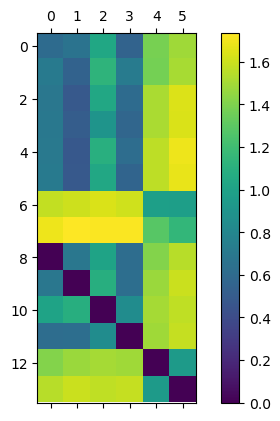

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.matshow(np.log10(1+dist_pivot))
cbar = fig.colorbar(ax)

In [ ]:
newdists = dist_pivot.copy()
newdists[newdists == 0] = np.inf
newdists.min()

dist from Model E                  3.028375
dist from Model E middle linear    2.028746
dist from Model F                  5.977510
dist from Model F middle linear    2.585584
dist from Model G                  7.808590
dist from Model G middle linear    7.808590
dtype: float64

# create table of results

In [82]:
res.pivot_table(values=['final train_loss', 'final train_accuracies',
                        'final validate_loss', 'final validate_accuracies',
                        'final test_accuracies', 'final test_loss'],
                index=('name','middlelinear','model sketch'))

final test_accuracies  \
name middlelinear model sketch                                                                
A    False        100 ReLU 50 ReLU 10 Softmax                                         87.76   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                   88.05   
B    False        100 ReLU 50 ReLU 10 Softmax                                         83.08   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                   82.57   
C    False        100 ReLU 50 ReLU 10 Softmax                                         82.69   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                   82.91   
D    False        100 ReLU 50 ReLU 10 Softmax                                         89.30   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                   88.74   
E    False        128 ReLU 64 ReLU 10 ReLU 10 ReLU 10 Softmax                         87.54   
     True         128 ReLU 64 Linear 10 Linear 10 ReLU 10 Softmax                     87.26   
F    False        128 Sigmoid 64 Sigmoid 10 Sigmoid 10 Sigmoid 10...                  41.15   
     True         128 Sigmoid 64 Linear 10 Linear 10 Sigmoid 10 S...                  83.45   
G    False        512 LeakyReLU 256 LeakyReLU 128 LeakyReLU 64 Le...                  90.55   
     True         512 LeakyReLU 256 Linear 128 Linear 64 LeakyReL...                  89.59   

                                                                      final test_loss  \
name middlelinear model sketch                                                          
A    False        100 ReLU 50 ReLU 10 Softmax                                0.343438   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax          0.336193   
B    False        100 ReLU 50 ReLU 10 Softmax                                0.472084   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax          0.493052   
C    False        100 ReLU 50 ReLU 10 Softmax                                0.489232   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax          0.480683   
D    False        100 ReLU 50 ReLU 10 Softmax                                0.305813   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax          0.321612   
E    False        128 ReLU 64 ReLU 10 ReLU 10 ReLU 10 Softmax                0.363651   
     True         128 ReLU 64 Linear 10 Linear 10 ReLU 10 Softmax            0.355611   
F    False        128 Sigmoid 64 Sigmoid 10 Sigmoid 10 Sigmoid 10...         1.353921   
     True         128 Sigmoid 64 Linear 10 Linear 10 Sigmoid 10 S...         0.606598   
G    False        512 LeakyReLU 256 LeakyReLU 128 LeakyReLU 64 Le...         0.278975   
     True         512 LeakyReLU 256 Linear 128 Linear 64 LeakyReL...         0.299082   

                                                                      final train_accuracies  \
name middlelinear model sketch                                                                 
A    False        100 ReLU 50 ReLU 10 Softmax                                      90.209259   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                91.083333   
B    False        100 ReLU 50 ReLU 10 Softmax                                      84.562963   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                83.720370   
C    False        100 ReLU 50 ReLU 10 Softmax                                      82.187037   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                83.014815   
D    False        100 ReLU 50 ReLU 10 Softmax                                      93.794444   
     True         100 ReLU 100 Linear 100 Linear 50 ReLU 10 Softmax                93.862963   
E    False        128 ReLU 64 ReLU 10 ReLU 10 ReLU 10 Softmax                      90.238889   
     True         128 ReLU 64 Linear 10 Linear 10 ReLU 10 Softmax   

In [83]:
piv = res.pivot_table(values=['final train_loss', 'final train_accuracies',
                        'final validate_loss', 'final validate_accuracies',
                        'final test_accuracies', 'final test_loss'],
                index=('name','middlelinear'))
piv

final test_accuracies  final test_loss  \
name middlelinear                                           
A    False                         87.76         0.343438   
     True                          88.05         0.336193   
B    False                         83.08         0.472084   
     True                          82.57         0.493052   
C    False                         82.69         0.489232   
     True                          82.91         0.480683   
D    False                         89.30         0.305813   
     True                          88.74         0.321612   
E    False                         87.54         0.363651   
     True                          87.26         0.355611   
F    False                         41.15         1.353921   
     True                          83.45         0.606598   
G    False                         90.55         0.278975   
     True                          89.59         0.299082   

                   final train_accuracies  final train_loss  \
name middlelinear                                             
A    False                      90.209259          0.268567   
     True                       91.083333          0.243428   
B    False                      84.562963          0.441018   
     True                       83.720370          0.460907   
C    False                      82.187037          0.504397   
     True                       83.014815          0.488265   
D    False                      93.794444          0.172951   
     True                       93.862963          0.166844   
E    False                      90.238889          0.268805   
     True                       90.400000          0.263389   
F    False                      41.794444          1.319286   
     True                       85.700000          0.560395   
G    False                      93.807407          0.165143   
     True                       93.438889          0.176405   

                   final validate_accuracies  final validate_loss  
name middlelinear                                                  
A    False                         88.566667             0.314253  
     True                          88.950000             0.309240  
B    False                         84.333333             0.450412  
     True                          83.550000             0.472192  
C    False                         84.000000             0.465508  
     True                          84.733333             0.443294  
D    False                         90.566667             0.283202  
     True                          90.000000             0.305008  
E    False                         89.250000             0.311269  
     True                          88.083333             0.330970  
F    False                         40.700000             1.352657  
     True                          84.350000             0.597748  
G    False                         91.066667             0.267932  
     True                          91.266667             0.246604

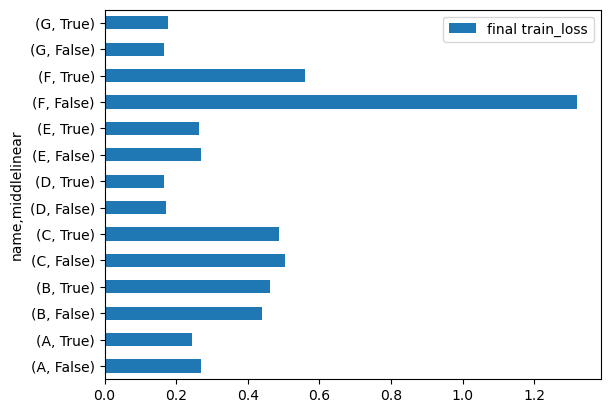

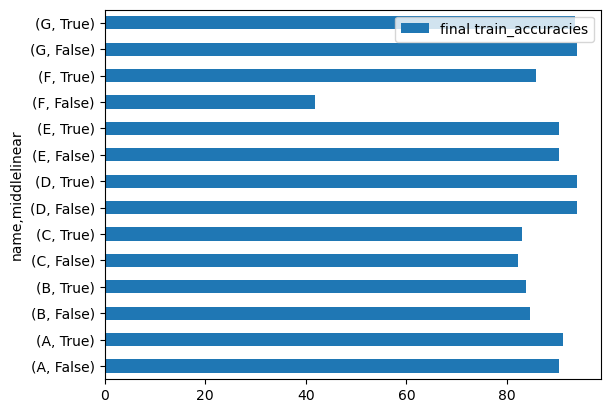

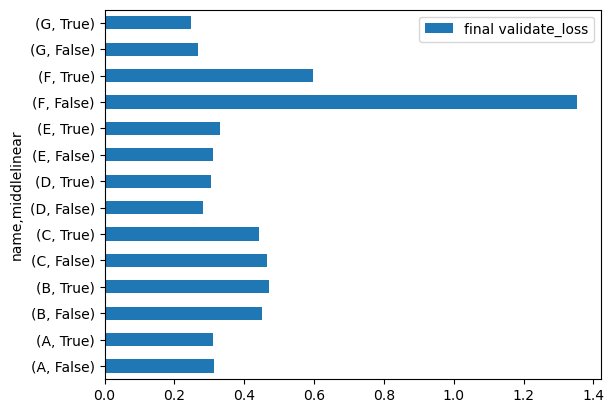

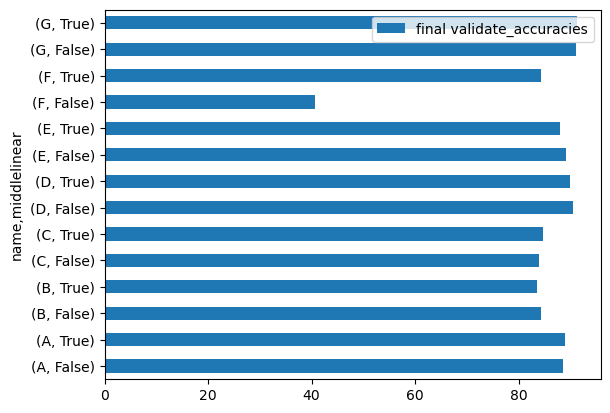

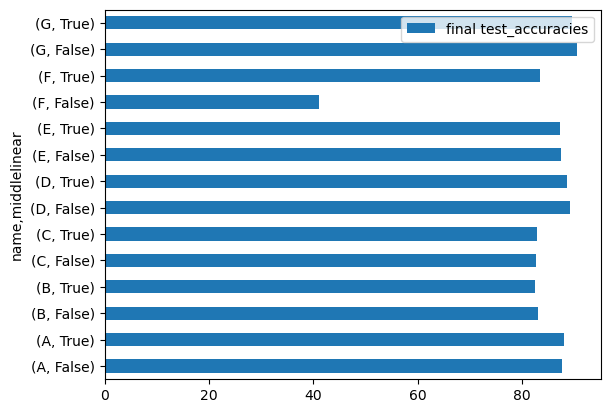

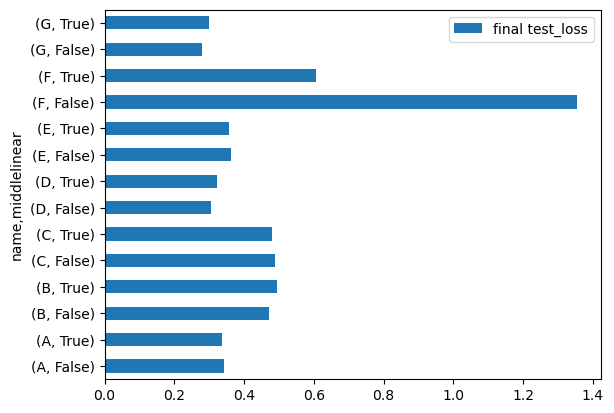

In [90]:
for metric in ['final train_loss', 'final train_accuracies',
                        'final validate_loss', 'final validate_accuracies',
                        'final test_accuracies', 'final test_loss']:
        res.pivot_table(values=metric,
                index=('name','middlelinear')).plot.barh()

In [ ]:
res.pivot_table(values=['final train_loss',
                        'final validate_loss',
                        'final test_accuracies', 'final test_loss'],
                index=('name','middlelinear','model sketch'))